In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [3]:
adi_data = pd.read_csv(r'C:\Users\Admin\Downloads\AVGO.csv')
def preprocess_data(df):
    df['Datetime'] = pd.to_datetime(df['Datetime']) 
    df.set_index('Datetime', inplace=True)           
    df = df.asfreq('D')                              
    df = df.fillna(method='ffill')                 
    return df
adi_data = preprocess_data(adi_data)
adi_close = adi_data[['LogAdjClose']].dropna()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10320\3415500981.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [4]:
def forecast_with_prophet(df, periods=90):
    df_prophet = df.reset_index().rename(columns={'Datetime': 'ds', 'LogAdjClose': 'y'})
    model = Prophet(daily_seasonality=True, yearly_seasonality=True)
    model.fit(df_prophet)
    
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast
adi_forecast_prophet = forecast_with_prophet(adi_close, periods=90)

09:36:34 - cmdstanpy - INFO - Chain [1] start processing
09:36:35 - cmdstanpy - INFO - Chain [1] done processing


09:38:29 - cmdstanpy - INFO - Chain [1] start processing
09:38:31 - cmdstanpy - INFO - Chain [1] done processing


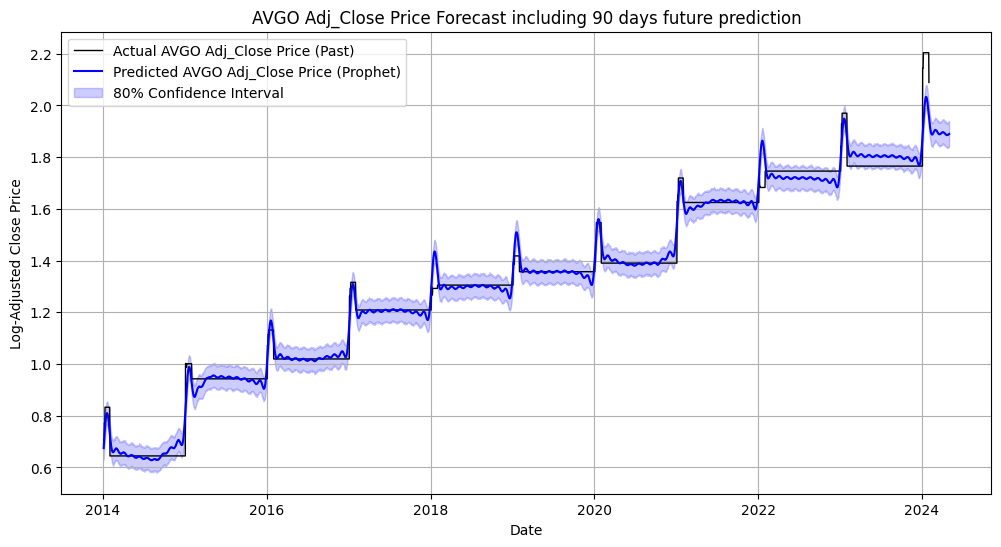

             ds      yhat  yhat_lower  yhat_upper
3681 2024-02-02  1.947439    1.902132    1.989424
3682 2024-02-03  1.938269    1.892299    1.984700
3683 2024-02-04  1.930563    1.885450    1.975028
3684 2024-02-05  1.922905    1.875615    1.967449
3685 2024-02-06  1.916306    1.870358    1.962388
...         ...       ...         ...         ...
3766 2024-04-27  1.886464    1.838529    1.936230
3767 2024-04-28  1.887525    1.839031    1.936057
3768 2024-04-29  1.888156    1.840884    1.937931
3769 2024-04-30  1.889253    1.839359    1.939315
3770 2024-05-01  1.889717    1.842197    1.938656

[90 rows x 4 columns]


In [8]:
adi_forecast_prophet = forecast_with_prophet(adi_close, periods=90)
plt.figure(figsize=(12, 6))
plt.plot(adi_close.index, adi_close['LogAdjClose'], label='Actual AVGO Adj_Close Price (Past)', color='black', linewidth=1)
plt.plot(adi_forecast_prophet['ds'], adi_forecast_prophet['yhat'], label='Predicted AVGO Adj_Close Price (Prophet)', color='blue')
plt.fill_between(adi_forecast_prophet['ds'], 
                 adi_forecast_prophet['yhat_lower'], 
                 adi_forecast_prophet['yhat_upper'], 
                 color='blue', alpha=0.2, label='80% Confidence Interval')
plt.title('AVGO Adj_Close Price Forecast including 90 days future prediction')
plt.xlabel('Date')
plt.ylabel('Log-Adjusted Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
future_forecast = adi_forecast_prophet.tail(90)
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])